<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

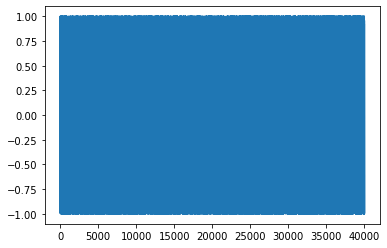

In [3]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)

In [4]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)

In [5]:
N

39990

In [6]:
X.shape

(39990, 10)

In [7]:
Y.shape

(39990,)

### Let's start with the simple linear model

In [8]:
#Trying out the linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=100,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5337 - val_loss: 0.5034
Epoch 2/100
625/625 [==============================] - 2s 2ms/step - loss: 0.5037 - val_loss: 0.5052
Epoch 3/100
625/625 [==============================] - 2s 2ms/step - loss: 0.5037 - val_loss: 0.5039
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5031 - val_loss: 0.5105
Epoch 5/100
625/625 [==============================] - 2s 2ms/step - loss: 0.5046 - val_loss: 0.5036
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 0.5041 - val_loss: 0.5041
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5044 - val_loss: 0.5063
Epoch 8/100
625/625 [==============================] - 2s 2ms/step - loss: 0.5037 - val_loss: 0.5037
Epoch 9/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5032 - val_loss: 0.5026
Epoch 10/100
625/625 [==============================] - 1s 2ms/step - loss: 0.5043 - val_lo

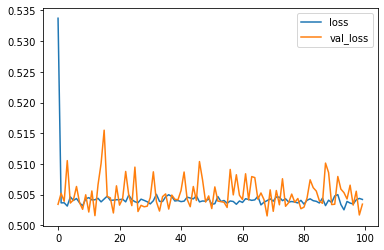

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

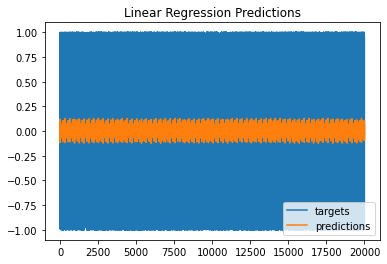

In [10]:
# 1 step forecast - the wrong way
outputs = model.predict(X[-N//2:])
predictions = outputs[:,0]

plt.plot(Y[-N//2:], label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()

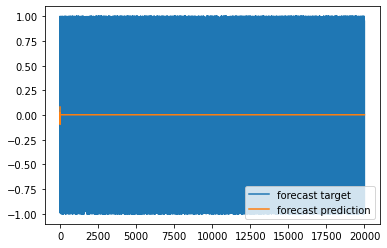

In [11]:
# Multi-step forecast the right way
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]

for _ in range(len(validation_target)):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

### Now let's move to the Simple RNN

In [12]:
X = X.reshape(-1, T, 1)

In [13]:
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
625/625 [==============================] - 6s 10ms/step - loss: 0.0904 - val_loss: 0.0100
Epoch 2/200
625/625 [==============================] - 6s 10ms/step - loss: 0.0125 - val_loss: 0.0133
Epoch 3/200
625/625 [==============================] - 6s 10ms/step - loss: 0.0178 - val_loss: 0.0082
Epoch 4/200
625/625 [==============================] - 6s 10ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 5/200
625/625 [==============================] - 6s 9ms/step - loss: 0.0184 - val_loss: 0.0124
Epoch 6/200
625/625 [==============================] - 6s 9ms/step - loss: 0.0308 - val_loss: 0.1298
Epoch 7/200
625/625 [==============================] - 6s 10ms/step - loss: 0.4862 - val_loss: 0.4719
Epoch 8/200
625/625 [==============================] - 6s 10ms/step - loss: 0.5076 - val_loss: 0.5104
Epoch 9/200
625/625 [==============================] - 6s 10ms/step - loss: 0.5131 - val_loss: 0.4888
Epoch 10/200
625/625 [==============================] - 6s 10ms/step - loss: 0.4995 

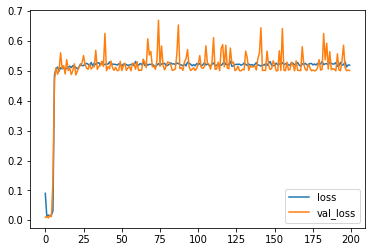

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

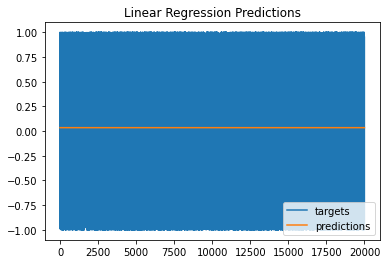

In [15]:
# 1 step forecast - the wrong way
outputs = model.predict(X[-N//2:])
predictions = outputs[:,0]

plt.plot(Y[-N//2:], label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()

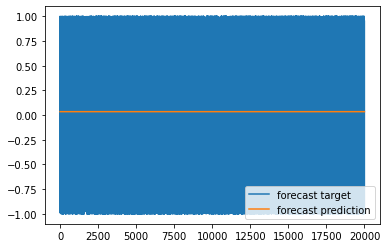

In [16]:
# Multi-step forecast the right way
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]

for _ in range(len(validation_target)):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

### Now let's move to the LSTM

In [17]:
i = Input(shape=(T, D))
x = LSTM(20)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=500,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/500
625/625 [==============================] - 3s 5ms/step - loss: 0.0445 - val_loss: 0.0047
Epoch 2/500
625/625 [==============================] - 3s 4ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 3/500
625/625 [==============================] - 3s 5ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 4/500
625/625 [==============================] - 3s 5ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/500
625/625 [==============================] - 3s 4ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 6/500
625/625 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0071
Epoch 7/500
625/625 [==============================] - 3s 4ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 8/500
625/625 [==============================] - 3s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/500
625/625 [==============================] - 3s 4ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 10/500
625/625 [==============================] - 3s 5ms/step - loss: 0.0016 - val_lo

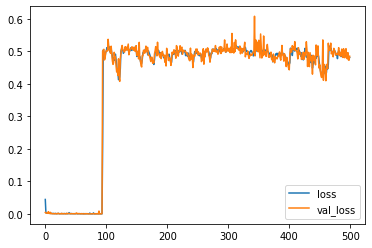

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

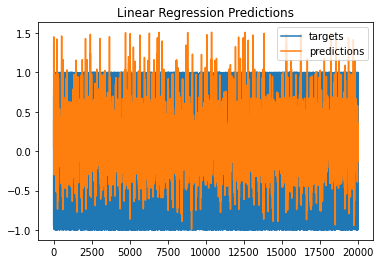

In [19]:
# 1 step forecast - the wrong way
outputs = model.predict(X[-N//2:])
predictions = outputs[:,0]

plt.plot(Y[-N//2:], label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()

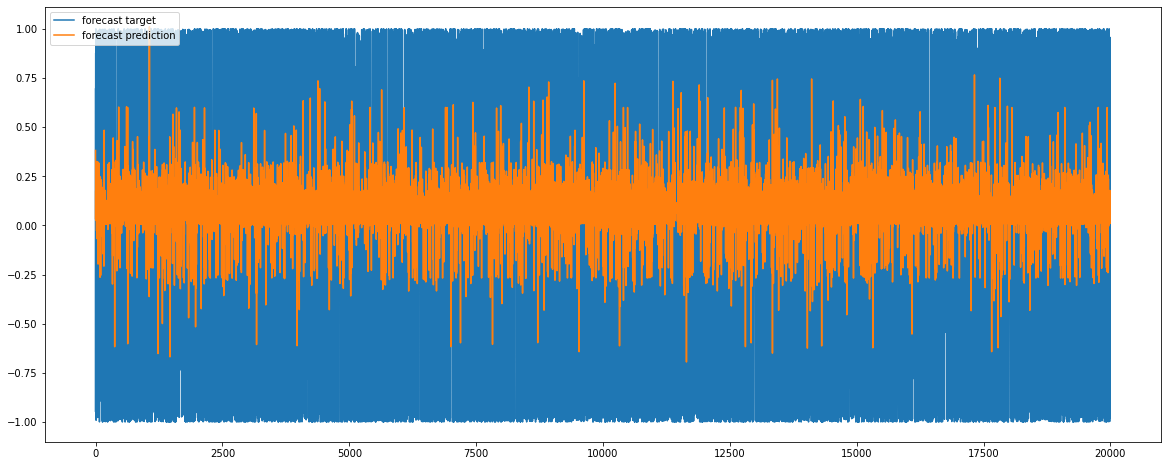

In [20]:
# Multi-step forecast the right way
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]

for _ in range(len(validation_target)):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.figure(figsize=(20,8))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()